# Right now this is a sample to figure out how to do this, but in reality, the "death" is convergence

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lifelines

from lifelines.datasets import load_dd

%matplotlib inline

In [5]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [6]:
df = pd.read_csv("BehaviorSpace_output/dynamic_network random_dis-table.csv")

In [7]:
df.head()

,[run number],number-of-adversarial,connection-strategy,cooperator-color-change-strategy,input-file-name,adversarial-placement,adversary-color-change-strategy,output-file-name,[step],(count nodes with [is-adversarial = 0 and color = item 0 (modes [color] of nodes with [is-adversarial = 0])]) / number-of-nodes,(count nodes with [is-adversarial = 0]) / (number-of-nodes)
0,1,10,random,naive-majority-vote,Barabasi1,low,disengaged,random_dis,0,0.12,0.9
1,6,10,random,naive-majority-vote,Barabasi2,high,disengaged,random_dis,0,0.15,0.9
2,5,10,random,naive-majority-vote,Barabasi2,medium,disengaged,random_dis,0,0.15,0.9
3,2,10,random,naive-majority-vote,Barabasi1,medium,disengaged,random_dis,0,0.12,0.9
4,4,10,random,naive-majority-vote,Barabasi2,low,disengaged,random_dis,0,0.15,0.9


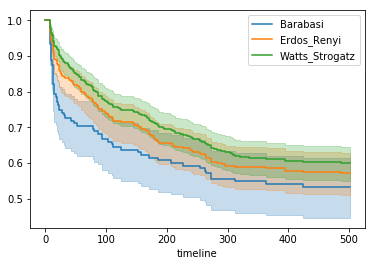

In [8]:
# now every col is the duration
durations_df = df.groupby(["[run number]", "input-file-name"]).count()
durations_df = durations_df.reset_index()

ax = plt.subplot(111)


durations = np.array([])

for network in ["Barabasi", "Erdos_Renyi", "Watts_Strogatz"]:
    for i in range(1, 6):
        durations = np.append(durations, 
                              durations_df.loc[durations_df['input-file-name'] == network+str(i)].iloc[: , -1].values)



    deaths = np.where(durations == 501, 0, 1)

    kmf = KaplanMeierFitter()

    kmf.fit(durations, event_observed=deaths, label = network)
    kmf.plot(ax=ax)


In [9]:
from lifelines.statistics import logrank_test

durations = np.array([])

for i in range(1, 6):
    b_durations = np.append(durations, 
                          durations_df.loc[durations_df['input-file-name'] == "Barabasi"+str(i)].iloc[: , -1].values)

    b_deaths = np.where(b_durations == 501, 0, 1)

    
durations = np.array([])

for i in range(1, 6):
    e_durations = np.append(durations, 
                          durations_df.loc[durations_df['input-file-name'] == "Erdos_Renyi"+str(i)].iloc[: , -1].values)

    e_deaths = np.where(e_durations == 501, 0, 1)

durations = np.array([])
    
for i in range(1, 6):
    w_durations = np.append(durations, 
                          durations_df.loc[durations_df['input-file-name'] == "Watts_Strogatz"+str(i)].iloc[: , -1].values)

    w_deaths = np.where(w_durations == 501, 0, 1)


In [10]:
w_deaths

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [11]:
print("Between Barabasi and Watts_Strogatz for random and disengaged")

results = logrank_test(b_durations, w_durations, b_deaths, w_deaths, alpha=.99)

results.print_summary()

print("Between Barabasi and Erdos_Renyi for random and disengaged")

results = logrank_test(b_durations, e_durations, b_deaths, e_deaths, alpha=.99)

results.print_summary()

print("Between Erdos_Renyi and Watts_Strogatz for random and disengaged")

results = logrank_test(e_durations, w_durations, e_deaths, w_deaths, alpha=.99)

results.print_summary()

Between Barabasi and Watts_Strogatz for random and disengaged
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99

---
test_statistic    p  -log2(p)
          0.58 0.45      1.16
Between Barabasi and Erdos_Renyi for random and disengaged
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99

---
test_statistic    p  -log2(p)
          0.11 0.74      0.43
Between Erdos_Renyi and Watts_Strogatz for random and disengaged
<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.99

---
test_statistic    p  -log2(p)
          0.25 0.62      0.70
